Anime Analysis

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read Data 
anime_df = pd.read_csv('./anime.csv')
rating_df = pd.read_csv('./rating.csv')

### Data problems 
- there are missing values 
- in `episode` the missing data is indicated by 'unknown' catogory

### My questions
1. most rating anime out of all
2. avarage rating of anime in each genre
3. which gives more popularity the movie or series 
4. most popular anime in each genre and type
5. which anime have least amount of episode in series

In [3]:
# Head of the data
anime_df.sample(10)

,anime_id,name,genre,type,episodes,rating,members
5513,295,Divergence Eve 2: Misaki Chronicles,"Adventure, Drama, Mecha, Military, Sci-Fi, Space",TV,13,6.43,4790
1331,102,Aishiteruze Baby★★,"Comedy, Drama, Romance, Shoujo",TV,26,7.58,63959
1485,798,Yomigaeru Sora: Rescue Wings,"Drama, Military, Seinen",TV,12,7.53,6871
9179,22573,Kero Kero Keroppi no Aladdin to Mahou no Lamp,"Fantasy, Kids",OVA,1,5.91,93
2248,1120,Pokemon: Mizu no Miyako no Mamorigami Latias t...,"Adventure, Comedy, Drama, Fantasy, Kids",Movie,1,7.32,42389
382,14713,Kamisama Hajimemashita,"Comedy, Demons, Fantasy, Romance, Shoujo, Supe...",TV,13,8.13,189641
5925,1552,Hiatari Ryoukou! Yume no Naka ni Kimi ga Ita,"Comedy, Drama, Romance",Movie,1,6.31,399
5554,9691,Kyomu Senshi Miroku,"Action, Demons, Fantasy, Historical, Samurai, ...",OVA,6,6.42,207
7157,4398,Kuro Nyago,Fantasy,Movie,1,5.68,1979
3142,632,Mahoromatic End Year Special,"Comedy, Ecchi, Military, Romance, Sci-Fi",Special,1,7.07,4783


In [4]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [5]:
print('Total number of anime we have is ::=',anime_df.shape[0])

Total number of anime we have is ::= 12294


In [6]:
# Check Missing values
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### EDA

In [7]:
# We will start by analysing simple things

In [8]:
# firstly we start with some highly rated animes - well i am intrested to know to 
anime_df.sort_values(by='rating',ascending=False).head(4)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [9]:
# From these we can find our first question answers that whic

In [10]:
# Now which anime got biggest community
all_top_community= anime_df.sort_values(by='members',ascending=False)[['name','members','type']].head(4)
all_top_community

,name,members,type
40,Death Note,1013917,TV
86,Shingeki no Kyojin,896229,TV
804,Sword Art Online,893100,TV
1,Fullmetal Alchemist: Brotherhood,793665,TV


<Axes: xlabel='name', ylabel='members'>

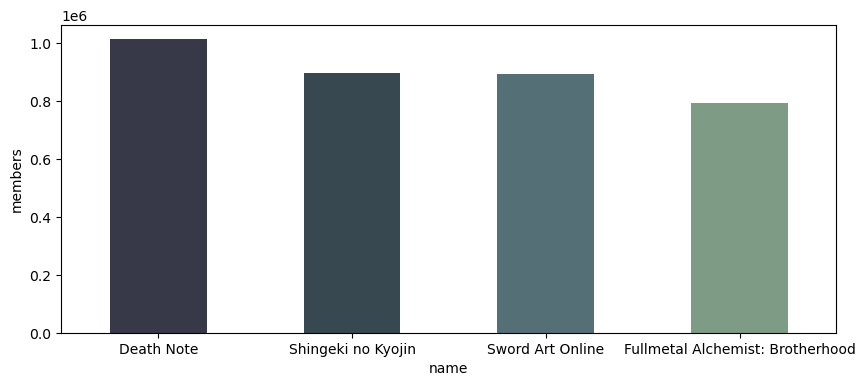

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(all_top_community,x='name',y='members',width=.5,palette=['#35374B','#344955','#50727B','#78A083'])

In [12]:
# Check the top 5 movie with big community
top_movie_community = anime_df.groupby('type').get_group('Movie').sort_values(by='members',ascending=False)[['name','members','type']].head(4)
top_movie_community

,name,members,type
15,Sen to Chihiro no Kamikakushi,466254,Movie
24,Mononoke Hime,339556,Movie
35,Howl no Ugoku Shiro,333186,Movie
411,Byousoku 5 Centimeter,324035,Movie


<Axes: xlabel='name', ylabel='members'>

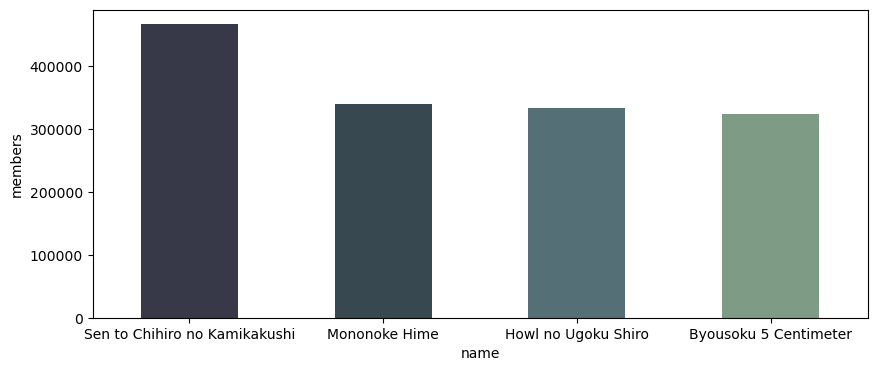

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(top_movie_community,x='name',y='members',width=.5,palette=['#35374B','#344955','#50727B','#78A083'])

In [14]:
def get_largest_anime_each_type(group_df):
       return group_df.sort_values(by='members',ascending=False)[['name','members']].head(3)

In [15]:
# Check the top 5 movie with big community
anime_df.groupby('type').apply(get_largest_anime_each_type)

name  members
type                                                                    
Movie   15                        Sen to Chihiro no Kamikakushi   466254
        24                                        Mononoke Hime   339556
        35                                  Howl no Ugoku Shiro   333186
Music   169                                             Shelter    71136
        2322                                 Black★Rock Shooter    40641
        336   Interstella5555: The 5tory of The 5ecret 5tar ...    31464
ONA     934                                 Hetalia Axis Powers   144898
        1145  Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...   101495
        246                                        Eve no Jikan    99074
OVA     456                                                FLCL   305165
        66                                    Hellsing Ultimate   297454
        4240       Highschool of the Dead: Drifters of the Dead   140501
Special 370           Clannad: Mou Hitotsu no Sekai, Tomoyo-hen   160423
        126               Steins;Gate: Oukoubakko no Poriomania   159548
        861                               Angel Beats! Specials   139013
TV      40                                           Death Note  1013917
        86                                   Shingeki no Kyojin   896229
        804                                    Sword Art Online   893100

In [16]:
# Now we analyse which genre got most average rating and members

In [17]:
# First we do some preprocessing
anime_df['genre'] = anime_df.genre.str.replace(' ','').str.split(',')

In [18]:
genre_df = anime_df.explode('genre')

In [19]:
genre_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,School,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [20]:
# Most common genres
most_common_genre = genre_df.groupby('genre')['anime_id'].count().sort_values(ascending=False).head(10)
most_common_genre

genre
Comedy         4645
Action         2845
Adventure      2348
Fantasy        2309
Sci-Fi         2070
Drama          2016
Shounen        1712
Kids           1609
Romance        1464
SliceofLife    1220
Name: anime_id, dtype: int64

<Axes: xlabel='genre'>

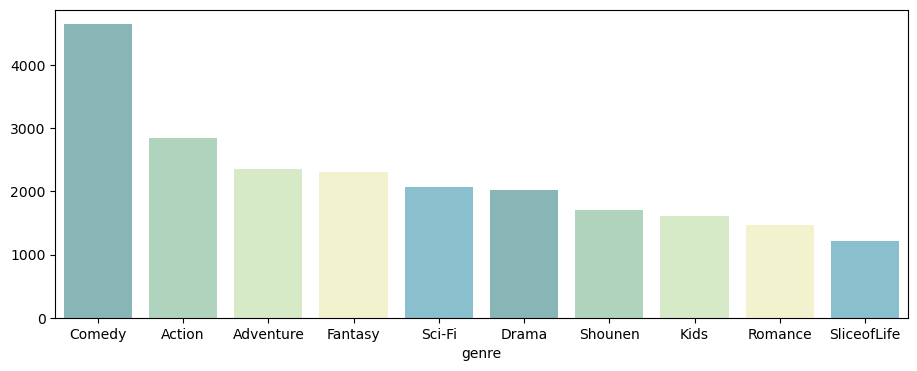

In [21]:
plt.figure(figsize=(11,4))
palette=['#80BCBD','#AAD9BB','#D5F0C1','#F9F7C9','#7FC7D9']
sns.barplot(x=most_common_genre.index,y=most_common_genre.values,palette=palette)

In [22]:
# Genre which got big community
top_genre_community = genre_df.groupby('genre')['members'].sum().sort_values(ascending=False).head(10)
top_genre_community

genre
Comedy          107001258
Action           95508123
Romance          65663654
Drama            58262597
Fantasy          57260631
Supernatural     57008004
School           55005585
Shounen          54115368
Adventure        45527104
Sci-Fi           44908742
Name: members, dtype: int64

<Axes: xlabel='genre'>

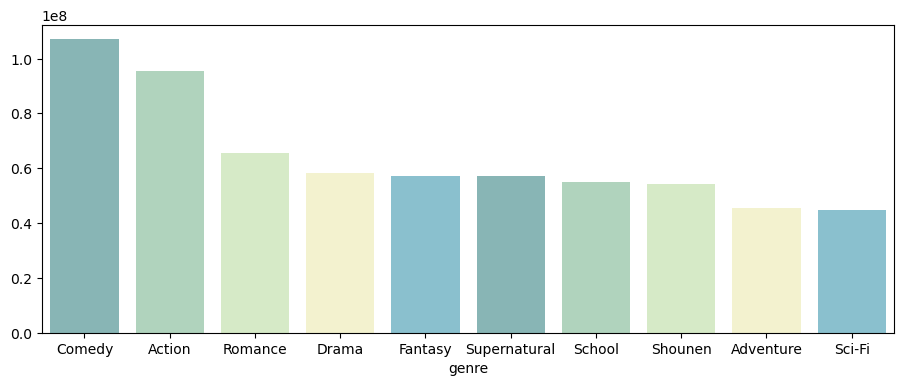

In [23]:
plt.figure(figsize=(11,4))
palette=['#80BCBD','#AAD9BB','#D5F0C1','#F9F7C9','#7FC7D9']
sns.barplot(x=top_genre_community.index,y=top_genre_community.values,palette=palette)

In [24]:
# Genre which got most average rating and medium rating
genre_df.groupby('genre')['rating'].mean().sort_values(ascending=False).head(10)

genre
Josei            7.443077
Thriller         7.382326
Mystery          7.232412
Police           7.122051
Shounen          7.057553
Psychological    7.010398
Military         7.004904
Supernatural     7.000380
Romance          6.999054
ShoujoAi         6.978148
Name: rating, dtype: float64

In [25]:
# Now check highest rating anime in each genre
genre_df.groupby('genre').apply(lambda x:x.sort_values(by='rating',ascending=False)[['name','rating']].head(1))

,,name,rating
genre,,,
Action,1,Fullmetal Alchemist: Brotherhood,9.26
Adventure,10400,Spoon-hime no Swing Kitchen,9.60
Cars,203,Redline,8.33
Comedy,10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00
Dementia,130,Neon Genesis Evangelion: The End of Evangelion,8.45
Demons,52,Kamisama Hajimemashita: Kako-hen,8.64
Drama,0,Kimi no Na wa.,9.37
Ecchi,61,Shokugeki no Souma,8.61
Fantasy,1,Fullmetal Alchemist: Brotherhood,9.26


In [26]:
# I guess that done as our anlaysis
# Now we will create the recomendattion system using collabrations filtering method

In [27]:
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [28]:
rating_df.duplicated().sum()

1

In [29]:
rating_df.drop_duplicates(inplace=True)

In [30]:
# First we have to remove all the users who did'nt rated
rating_df = rating_df[rating_df.rating!=-1]

In [31]:
rating_df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [32]:
# Now we are going to select the users atleast did rating a treshold value
rating_users = rating_df.user_id.value_counts()[rating_df.user_id.value_counts()>50].index

In [33]:
# Now we filter the good rating users from the main rating data
rating_df = rating_df[rating_df['user_id'].isin(rating_users)]

In [34]:
rating_df

,user_id,anime_id,rating
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9
...,...,...,...
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9


In [35]:
# Now next we will take anime the rated by some thrreshold value
popular_rating_animes = rating_df.anime_id.value_counts()[rating_df.anime_id.value_counts()>100].index

In [36]:
# Now we will filter the anime that have rated by atleast diffrent 100(thershold) people 
rating_df = rating_df[rating_df.anime_id.isin(popular_rating_animes)]


### Model Building

#### Vecorization

 Now we will do vectorization and for that we will simply create a pivot table which index will  contain each anime_id and column wil contain each users_id and the values in them will be the rating done  the each user

In [37]:
pt_rating = rating_df.pivot_table(index='anime_id',columns='user_id',values='rating').fillna(0)

In [38]:
pt_rating

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,...,10.0,9.0,0.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
6,0.0,8.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [40]:
# calculate the cosine_similarity between the vectors
cs_rating = cosine_similarity(pt_rating)

In [41]:
# Calculate the euclidean distance between the vectors
ed_rating = euclidean_distances(pt_rating)

In [42]:
# Here we got the cosine similarity between each movie
sim_df = pd.DataFrame(cs_rating)

In [43]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [44]:
def recommend_anime(anime_name):
    
    # First we search the anime in the names to get it's index 
    anime_index = np.where(anime_df['name'].str.replace(' ','').str.lower() == anime_name.replace(' ','').lower())[0][0]

    # then we locate the anime in the similarity df
    similarity_series = sim_df.iloc[anime_index]
    
    # Then we sort the series in descending order 
    sorted_similarity_list = sorted(list(enumerate(similarity_series)),key=lambda x:x[1],reverse=True)[1:6]
    
    # return top 5 most similar anime
    for i in sorted_similarity_list:
        print(anime_df.iloc[i[0]]['name'])

In [46]:
recommend_anime('naruto')

Mahouka Koukou no Rettousei
Majin Tantei Nougami Neuro
Yamada-kun to 7-nin no Majo (OVA)
Kami nomi zo Shiru Sekai II
Black Cat
